<a href="https://colab.research.google.com/github/asierra383/The-Dali-Museum-Cost-Benefit-Analysis/blob/main/The_Dal%C3%AD_Museum_Official_Cost_Benefit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This deliverable used 8 staff members as the sample size to calculate the Cost-Benefit Analysis of SaaS vendors for digital asset management and digital preservation systems. In total, there are 51 users of digital assets, according to statement given by Jeremy Beam, the Systems Administrator of the IT/AV department.

In order to get the Cost-Benefit Analysis, I most import some Python libraries that are relevant. Since I need to perform math & data visualizations, the ones that are showh below have been selected.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Background & Context:

In order to better understand how the calculations are done, there is information that must be given.

*   The fixed numbers given is to set a benchmark for simplified calculations
  * Staff has a varying amount of vacation weeks, so I set the number of weeks working to 48 to make a scenario where all staff has 4 weeks of vacation
  * I set the hours of working per week to 40 since all staff in the sample size are considered full-time
  * When comparing sunk hours & cost with SaaS savings, I applied the Pareto Principle, also called the 80/20 Rule, to state that there would be an 80% in time and wage savings from a system by implementing it
*   There were 2 types of staff information that was collected differently in order to use them in the calculations with the fixed numbers
  * The number of sunks hours was collected based on the total number of hours wasted from 5 given scenarios that are provided on [Canto's DAM ROI calculator](https://www.canto.com/dam-roi/)
  * Salaries were given based on the [Association of Art Museum Directors (AAMD) 2023 Salary Survey](https://thedali-my.sharepoint.com/:b:/g/personal/asierra_thedali_onmicrosoft_com/EURAYZEaXLlBmFl5OlEKMxYBX7jV8hyZzOlr94u5Ajw2tA?e=q2bg2O) report, specifically, the mean salary of the Southeast region was used
* In order to get the given prices of the system vendors, there were steps taken and vendors also needed certain information to give a quote
  * An initial meeting was usually conducted first in order to follow up with a product demonstration, & then pricing was discussed
  * Vendors usually asked for storage needs (hot & cold), storage type, numbers of users (concurrent and/or admin users), and needed vendor native integrations


In [103]:
#Fixed numbers
annual_weeks_working = 48
hours_working_per_week = 40
SaaS_saving_percentage = 0.8

# Staff Information Calculations

Calculations must be made to find the hourly wage of staff members to understand how much of staff wages are being wasted on the current state of digital asset workflows. This would lead to understanding what is the annual sunk cost and time.

In [104]:
Staff_Info = pd.DataFrame({
    "Salary": [70500, 48100, 57000, 90700, 88200, 87000, 72100, 57000],
    "Sunk Hours/wk": [12, 18, 17, 12, 8, 11, 15, 14.5]
})

Staff_Info.index = ["Marketing Manager", "Content Producer", "Community Programs & Education Manager", "Senior Art Director", "Director of Education", "Curator & Senior Interpreter", "Collection Manager, Librarian and Archivist", "School Programs & Education Manager"]

Hourly_Wage = Staff_Info["Salary"] / (annual_weeks_working * hours_working_per_week)
Staff_Info["Hourly Wage"] = round(Hourly_Wage, 2)

Annual_Sunk_Hours = Staff_Info["Sunk Hours/wk"] * annual_weeks_working
Staff_Info["Sunk Hours/yr"] = Annual_Sunk_Hours

Annual_Sunk_Cost = Staff_Info["Sunk Hours/yr"] * Hourly_Wage
Staff_Info["Sunk Cost/yr"] = Annual_Sunk_Cost

Staff_Info


,Salary,Sunk Hours/wk,Hourly Wage,Sunk Hours/yr,Sunk Cost/yr
Marketing Manager,70500,12.0,36.72,576.0,21150.0
Content Producer,48100,18.0,25.05,864.0,21645.0
Community Programs & Education Manager,57000,17.0,29.69,816.0,24225.0
Senior Art Director,90700,12.0,47.24,576.0,27210.0
Director of Education,88200,8.0,45.94,384.0,17640.0
Curator & Senior Interpreter,87000,11.0,45.31,528.0,23925.0
"Collection Manager, Librarian and Archivist",72100,15.0,37.55,720.0,27037.5
School Programs & Education Manager,57000,14.5,29.69,696.0,20662.5


In [105]:
total_annual_sunk_hours = Staff_Info["Sunk Hours/yr"].sum()
print(f"Total Annual Sunk Hours: {int(total_annual_sunk_hours)}")

total_annual_sunk_cost = Staff_Info["Sunk Cost/yr"].sum()
print(f"Total Annual Sunk Cost: ${int(total_annual_sunk_cost)}")

Total Annual Sunk Hours: 5160
Total Annual Sunk Cost: $183495


In [106]:
Staff_Info.describe()

,Salary,Sunk Hours/wk,Hourly Wage,Sunk Hours/yr,Sunk Cost/yr
count,8.00000,8.000000,8.000000,8.000000,8.000000
mean,71325.00000,13.437500,37.148750,645.000000,22936.875000
std,16287.39653,3.310562,8.482889,158.906981,3290.720924
min,48100.00000,8.000000,25.050000,384.000000,17640.000000
25%,57000.00000,11.750000,29.690000,564.000000,21028.125000
50%,71300.00000,13.250000,37.135000,636.000000,22785.000000
75%,87300.00000,15.500000,45.467500,744.000000,24928.125000
max,90700.00000,18.000000,47.240000,864.000000,27210.000000


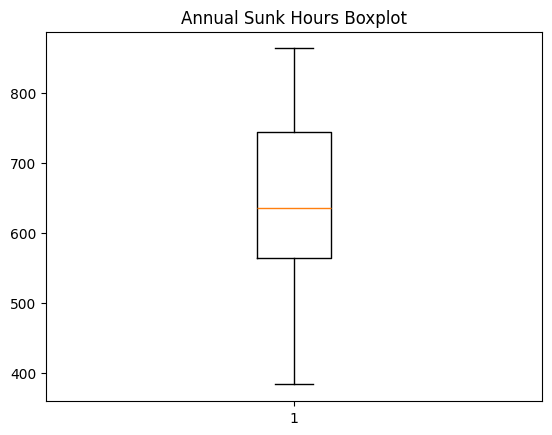

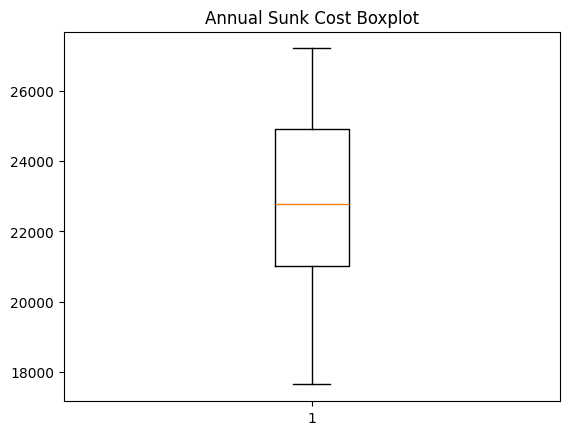

In [107]:
plt.boxplot(Staff_Info["Sunk Hours/yr"])
plt.title("Annual Sunk Hours Boxplot")
plt.show()

plt.boxplot(Staff_Info['Sunk Cost/yr'])
plt.title("Annual Sunk Cost Boxplot")
plt.show()

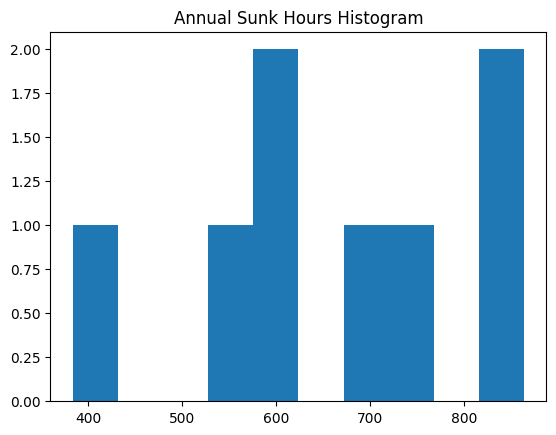

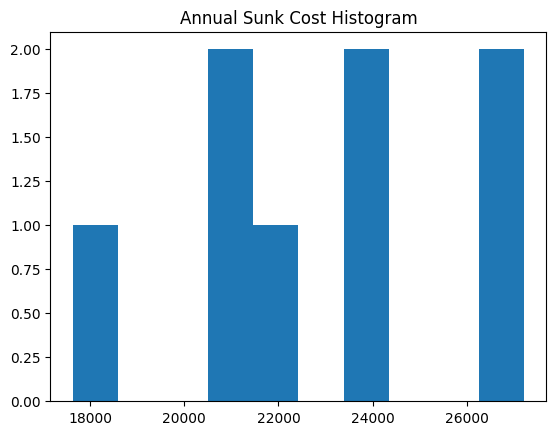

In [108]:
plt.hist(Staff_Info["Sunk Hours/yr"], bins=10)
plt.title("Annual Sunk Hours Histogram")
plt.show()

plt.hist(Staff_Info['Sunk Cost/yr'], bins=10)
plt.title("Annual Sunk Cost Histogram")
plt.show()

# DAM & Digital Preservation System Calculations
By applying the 80/20 Rule, a benchmark can be established for the hours and costs that can be saved on a yearly basis by implementing this type of SaaS. With having the prices given by the SaaS vendors, we can have an understanding for what the industry standard looks like, and therefore we can proceed to a cost benefit analysis.

In [109]:
SaaS_Annual_Hours_Saved = Staff_Info["Sunk Hours/yr"] * SaaS_saving_percentage
Staff_Info["SaaS Hours Saved/yr"] = SaaS_Annual_Hours_Saved

SaaS_Annual_Savings = Staff_Info["SaaS Hours Saved/yr"] * Hourly_Wage
Staff_Info["SaaS Savings/yr"] = SaaS_Annual_Savings

Staff_Info[["SaaS Hours Saved/yr", "SaaS Savings/yr"]]

,SaaS Hours Saved/yr,SaaS Savings/yr
Marketing Manager,460.8,16920.0
Content Producer,691.2,17316.0
Community Programs & Education Manager,652.8,19380.0
Senior Art Director,460.8,21768.0
Director of Education,307.2,14112.0
Curator & Senior Interpreter,422.4,19140.0
"Collection Manager, Librarian and Archivist",576.0,21630.0
School Programs & Education Manager,556.8,16530.0


In [110]:
total_annual_hours_saved = Staff_Info["SaaS Hours Saved/yr"].sum()
print(f"Total Annual Hours Saved: {int(total_annual_hours_saved)}")

total_annual_savings = Staff_Info["SaaS Savings/yr"].sum()
print(f"Total Annual Savings: ${int(total_annual_savings)}")

Total Annual Hours Saved: 4128
Total Annual Savings: $146796


In [111]:
System_Costs = pd.DataFrame({
    "One Time Cost": [5000, 0, 6648.05, 5515.47, 0, 21100, 3000, 0, 6000, 0, 0, 0, 25000],
    "Annual Cost": [27500, 23400, 24930.20, 25804.22, 25068, 29814, 29500, 13632, 14000, 32020, 24796, 20000, 16500]
})

System_Costs.index = ["Acquia", "Archivematica", "Arkivum", "Asset Bank", "Filecamp", "Fotoware", "Netx", "Pics.io", "Piction", "Preservica365", "Resource Space", "Soutron Global", "Terentia"]
Total_Start_Cost1 = System_Costs["One Time Cost"] + System_Costs["Annual Cost"]
System_Costs["Total Start Cost"] = Total_Start_Cost1

System_Costs

,One Time Cost,Annual Cost,Total Start Cost
Acquia,5000.00,27500.00,32500.00
Archivematica,0.00,23400.00,23400.00
Arkivum,6648.05,24930.20,31578.25
Asset Bank,5515.47,25804.22,31319.69
Filecamp,0.00,25068.00,25068.00
Fotoware,21100.00,29814.00,50914.00
Netx,3000.00,29500.00,32500.00
Pics.io,0.00,13632.00,13632.00
Piction,6000.00,14000.00,20000.00
Preservica365,0.00,32020.00,32020.00


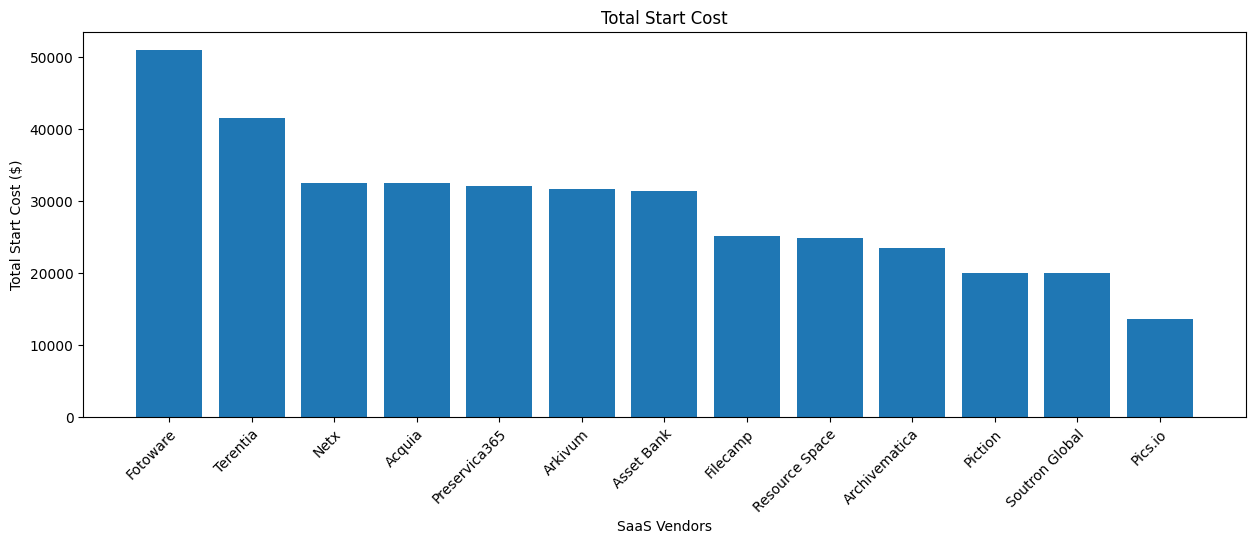

In [112]:
sorted_total_start_costs = System_Costs.sort_values(by = "Total Start Cost", ascending = False)

plt.figure(figsize=(15, 5))
plt.bar(sorted_total_start_costs.index, sorted_total_start_costs["Total Start Cost"])
plt.title("Total Start Cost")
plt.xlabel("SaaS Vendors")
plt.ylabel("Total Start Cost ($)")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

In [113]:
System_Costs.describe()

,One Time Cost,Annual Cost,Total Start Cost
count,13.000000,13.000000,13.000000
mean,5558.732308,23612.647692,29171.380000
std,8231.714153,5948.897645,9765.628374
min,0.000000,13632.000000,13632.000000
25%,0.000000,20000.000000,23400.000000
50%,3000.000000,24930.200000,31319.690000
75%,6000.000000,27500.000000,32500.000000
max,25000.000000,32020.000000,50914.000000


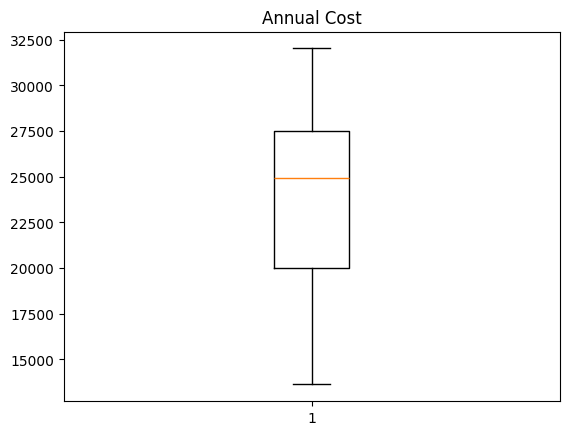

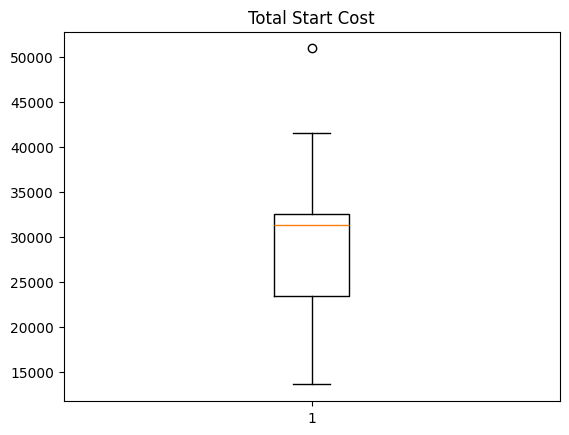

In [114]:
plt.boxplot(System_Costs["Annual Cost"])
plt.title("Annual Cost")
plt.show()

plt.boxplot(System_Costs["Total Start Cost"])
plt.title("Total Start Cost")
plt.show()

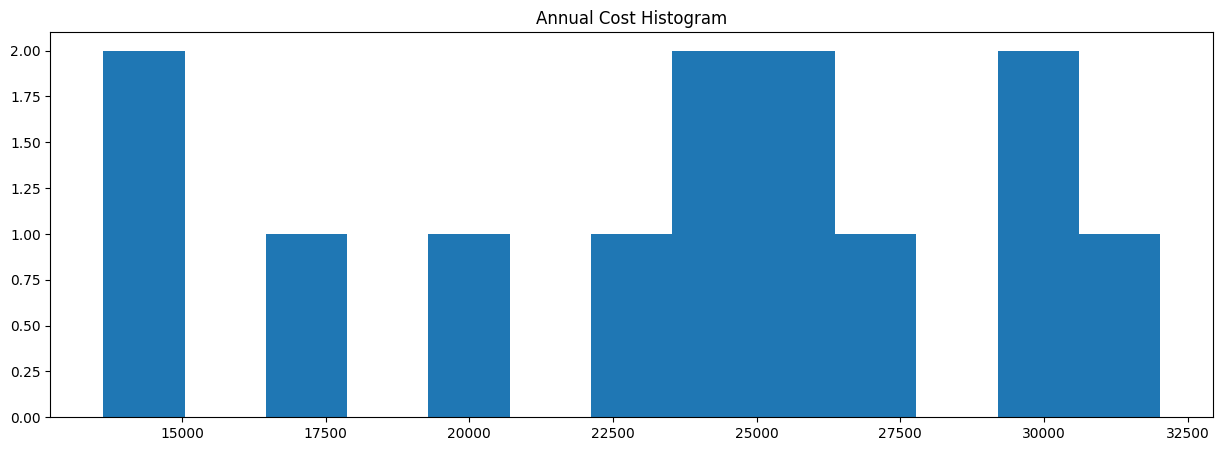

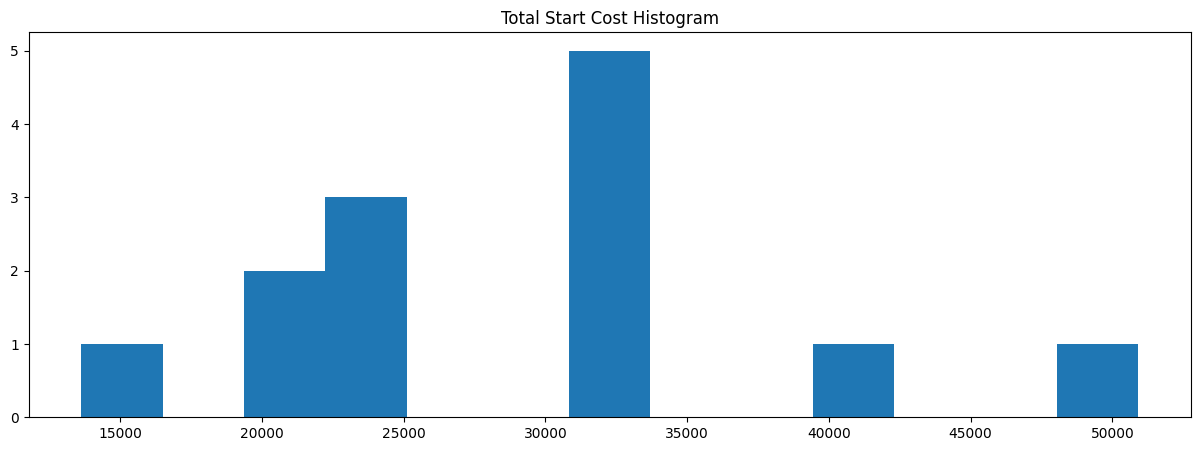

In [115]:
plt.figure(figsize=(15, 5))
plt.hist(System_Costs["Annual Cost"], bins=13)
plt.title("Annual Cost Histogram")
plt.show()

plt.figure(figsize=(15, 5))
plt.hist(System_Costs["Total Start Cost"], bins=13)
plt.title("Total Start Cost Histogram")
plt.show()

# Final Calculations: Net Present Value & Cost Benefit Ratio
Now we can proceed with doing the calculations for the cost benefit analysis.

Net Present Value = ∑ Present Value of Expected Benefits - ∑ Present Value of Future Costs

Cost Benefit Ratio = ∑ Present Value of Expected Benefits / ∑ Present Value of Future Costs

Comment on ROI calculations:

Net Present Value (NPV)
Cost Benefit Ratio (CBR)

In [144]:
Net_Present1 = total_annual_savings - System_Costs["Annual Cost"]
Cost_Benefit_Ratio1 = round((total_annual_savings / System_Costs["Annual Cost"]), 2)

Final_Calcs_Annual_Cost = pd.DataFrame({
    "NPV": Net_Present1,
    "CBR": round(Cost_Benefit_Ratio1, 2)
})

Final_Calcs_Annual_Cost.index = ["Acquia", "Archivematica", "Arkivum", "Asset Bank", "Filecamp", "Fotoware", "Netx", "Pics.io", "Piction", "Preservica365", "Resource Space", "Soutron Global", "Terentia"]
Final_Calcs_Annual_Cost.index.name = "Annual Cost"

Final_Calcs_Annual_Cost


,NPV,CBR
Annual Cost,,
Acquia,119296.00,5.34
Archivematica,123396.00,6.27
Arkivum,121865.80,5.89
Asset Bank,120991.78,5.69
Filecamp,121728.00,5.86
Fotoware,116982.00,4.92
Netx,117296.00,4.98
Pics.io,133164.00,10.77
Piction,132796.00,10.49


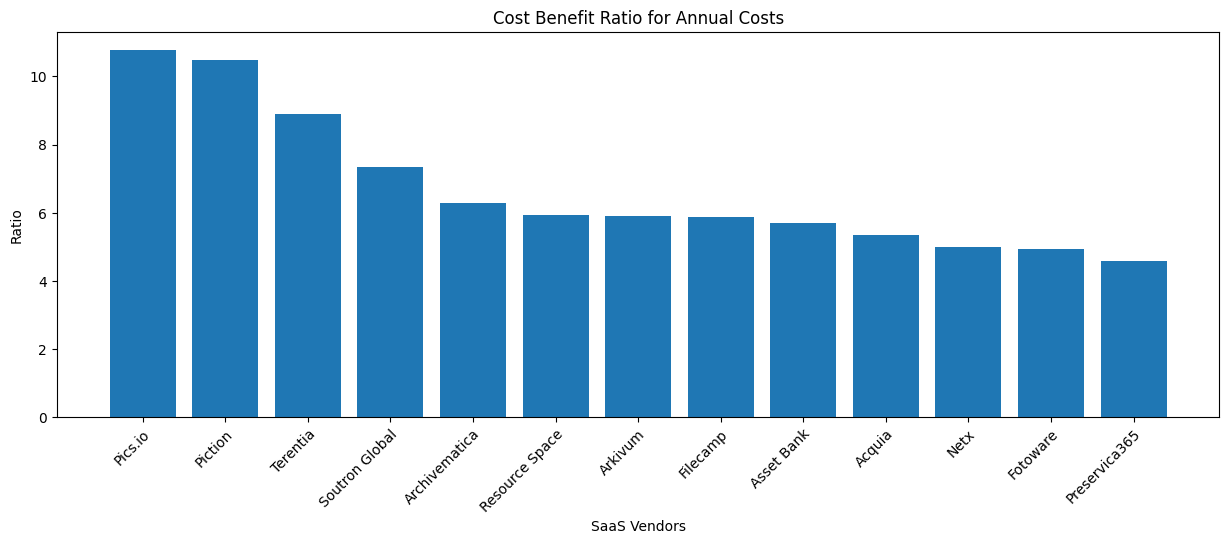

In [154]:
sorted_final_calcs_annual_cost = Final_Calcs_Annual_Cost.sort_values(by = "CBR", ascending = False)

plt.figure(figsize=(15, 5))
plt.bar(sorted_final_calcs_annual_cost.index, sorted_final_calcs_annual_cost["CBR"])
plt.title("Cost Benefit Ratio for Annual Costs")
plt.xlabel("SaaS Vendors")
plt.ylabel("Ratio")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

In [147]:
Final_Calcs_Annual_Cost.describe()

,NPV,CBR
count,13.000000,13.000000
mean,123183.352308,6.688462
std,5948.897645,2.078116
min,114776.000000,4.580000
25%,119296.000000,5.340000
50%,121865.800000,5.890000
75%,126796.000000,7.340000
max,133164.000000,10.770000


In [148]:
Net_Present2 = total_annual_savings - System_Costs["Total Start Cost"]
Cost_Benefit_Ratio2 = round((total_annual_savings / System_Costs["Total Start Cost"]), 2)

Final_Calcs_Total_Start_Cost = pd.DataFrame({
    "NPV": Net_Present2,
    "CBR": round(Cost_Benefit_Ratio2, 2)
})

Final_Calcs_Total_Start_Cost.index.name = "Total Start Cost"
Final_Calcs_Total_Start_Cost.drop(["Archivematica", "Filecamp", "Pics.io", "Preservica365", "Resource Space", "Soutron Global"])

,NPV,CBR
Total Start Cost,,
Acquia,114296.00,4.52
Arkivum,115217.75,4.65
Asset Bank,115476.31,4.69
Fotoware,95882.00,2.88
Netx,114296.00,4.52
Piction,126796.00,7.34
Terentia,105296.00,3.54


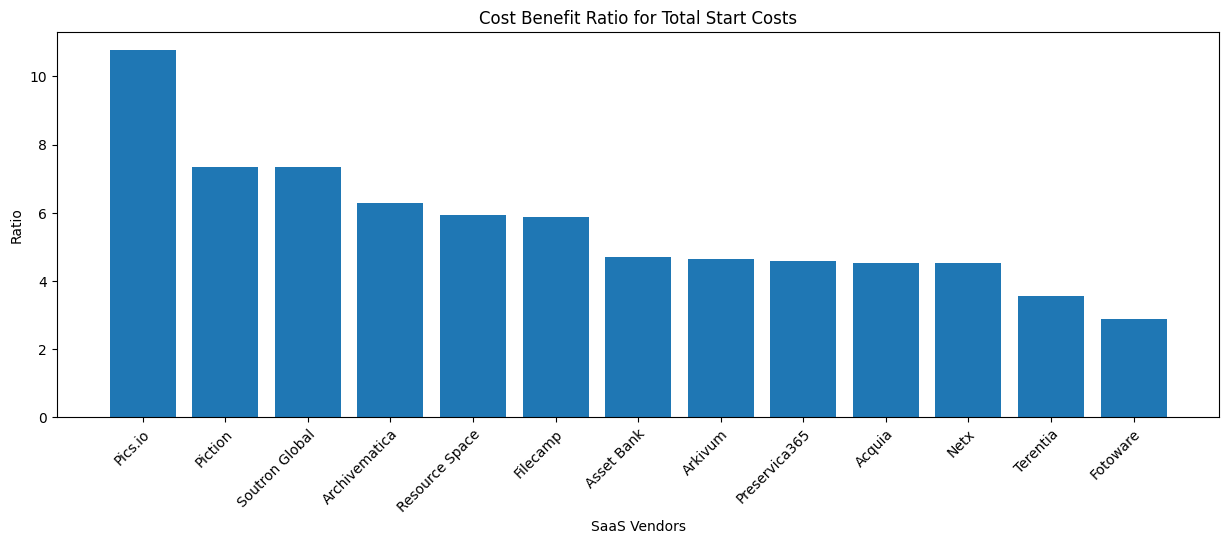

In [155]:
sorted_final_calcs_total_cost = Final_Calcs_Total_Start_Cost.sort_values(by = "CBR", ascending = False)

plt.figure(figsize=(15, 5))
plt.bar(sorted_final_calcs_total_cost.index, sorted_final_calcs_total_cost["CBR"])
plt.title("Cost Benefit Ratio for Total Start Costs")
plt.xlabel("SaaS Vendors")
plt.ylabel("Ratio")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

In [157]:
Final_Calcs_Total_Start_Cost.describe()

,NPV,CBR
count,13.000000,13.000000
mean,117624.620000,5.606154
std,9765.628374,2.044267
min,95882.000000,2.880000
25%,114296.000000,4.520000
50%,115476.310000,4.690000
75%,123396.000000,6.270000
max,133164.000000,10.770000


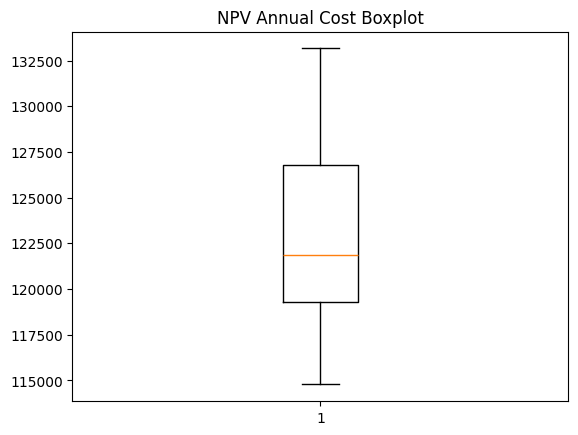

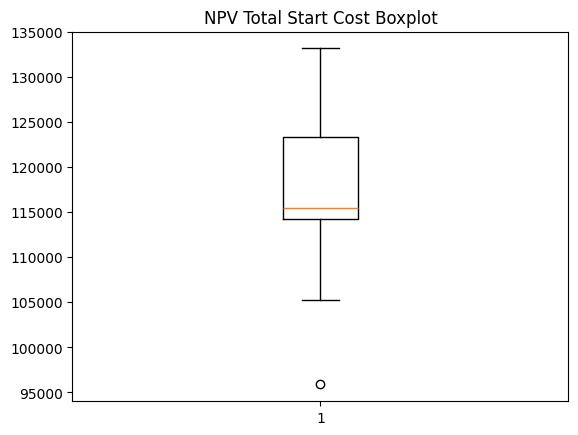

In [158]:
plt.boxplot(Net_Present1)
plt.title("NPV Annual Cost Boxplot")
plt.show()

plt.boxplot(Net_Present2)
plt.title("NPV Total Start Cost Boxplot")
plt.show()

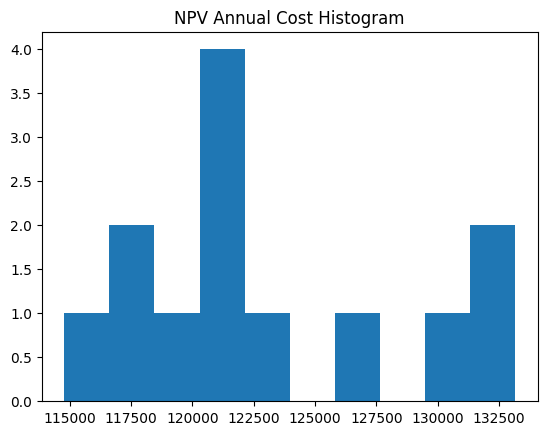

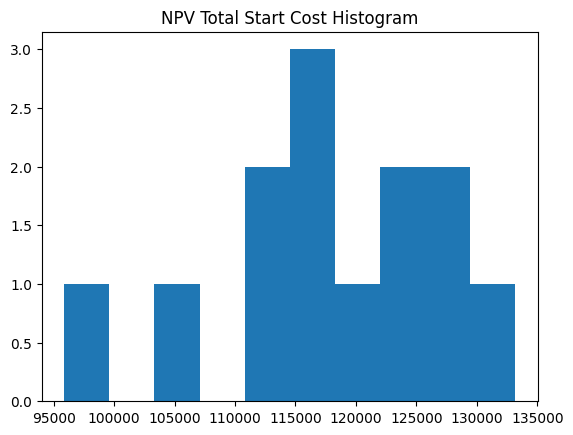

In [159]:
plt.hist(Net_Present1, bins=10)
plt.title("NPV Annual Cost Histogram")
plt.show()

plt.hist(Net_Present2, bins=10)
plt.title("NPV Total Start Cost Histogram")
plt.show()

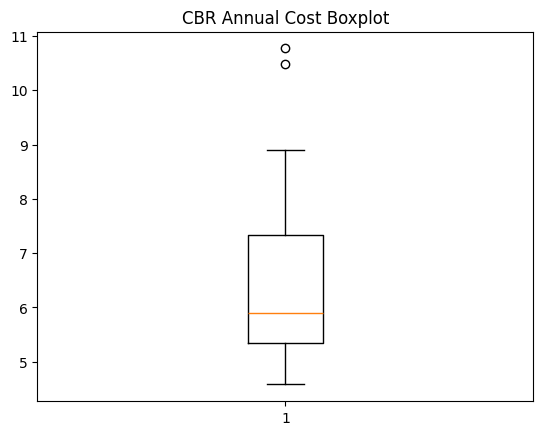

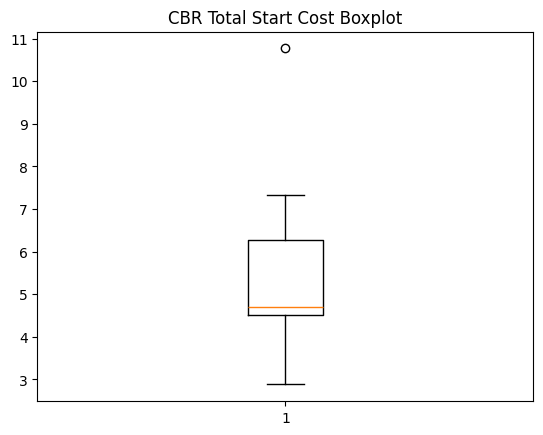

In [160]:
plt.boxplot(Cost_Benefit_Ratio1)
plt.title("CBR Annual Cost Boxplot")
plt.show()

plt.boxplot(Cost_Benefit_Ratio2)
plt.title("CBR Total Start Cost Boxplot")
plt.show()

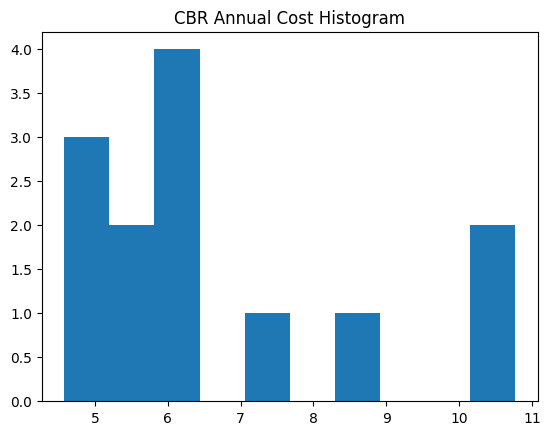

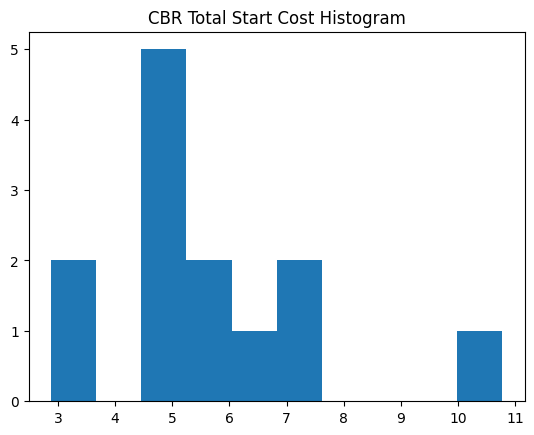

In [161]:
plt.hist(Cost_Benefit_Ratio1, bins=10)
plt.title("CBR Annual Cost Histogram")
plt.show()

plt.hist(Cost_Benefit_Ratio2, bins=10)
plt.title("CBR Total Start Cost Histogram")
plt.show()



---







# Thank you for checking this out!